In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## 타이타닉 데이터 로드
df = sns.load_dataset("titanic")
df.info()
## 0 : 생존 여부
## 1 : 객실 등급
## 2 : 성별
## 3 : 나이
## 4 : 함꼐 탑승한 형제 및 배우자 수
## 5 : 함계 탑승한 자녀 및 부모 수
## 6 : 요금
## 7 : 탑승한 도시의 첫 글자 (C(Cherbourg), Q(Queenstown), S(Southampton))
## 8 : 객실 등급
## 9 : 남성, 여성, 아이
## 10: 성인 남성 여부
## 11: 선실 번호
## 12: 탑승한 도시
## 13: 생존 여부
## 14: 혼자 탑승 여부

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
## 생존자 및 사망자 수
print(df['survived'].value_counts())

survived
0    549
1    342
Name: count, dtype: int64


alive
no     549
yes    342
Name: count, dtype: int64


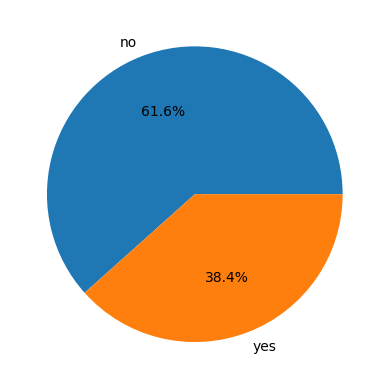

In [5]:
## alive 열을 이용한 생존자 및 사망자 수
print(df['alive'].value_counts())

## 생존여부 구성비 (파이 그래프)
plt.pie(df['alive'].value_counts(), labels=['no','yes'], autopct="%.1f%%")
plt.show()

who
man      537
woman    271
child     83
Name: count, dtype: int64


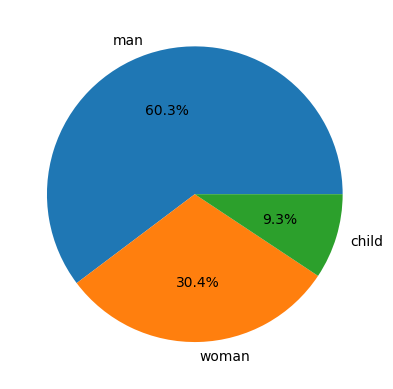

In [6]:
## 성별 및 아이별 구성비
print(df['who'].value_counts())

## 성별 및 아이별 구성비 (파이 그래프)
plt.pie(df['who'].value_counts(), labels=['man','woman','child'], autopct="%.1f%%")
plt.show()

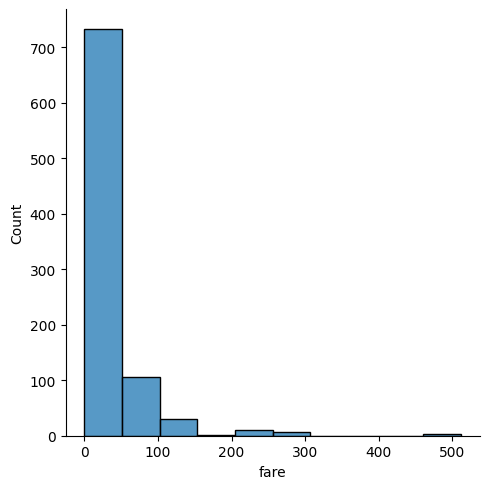

In [7]:
## 탑승자의 요금 분포 (hist)
sns.displot(data=df, x='fare', bins=10)
plt.show()

In [8]:
## 탑승자의 요금 분포 구성비 pd.cut()
ages = pd.cut(df['fare'], bins=10)
ages.value_counts()

fare
(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(204.932, 256.165]     11
(256.165, 307.398]      6
(461.096, 512.329]      3
(153.699, 204.932]      2
(307.398, 358.63]       0
(358.63, 409.863]       0
(409.863, 461.096]      0
Name: count, dtype: int64

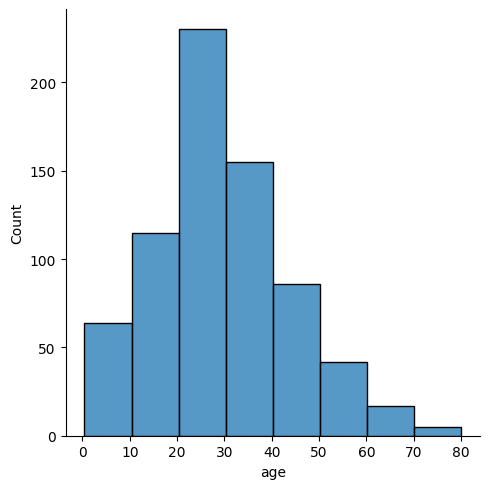

In [9]:
## 탑승자의 세대별 나이 분포 (displot의 hist) 
sns.displot(data=df, x='age', bins=8)
plt.show()

In [10]:
## 탑승자의 나이별 구성비
ages = pd.cut(df['age'], bins=range(0,101,10))
ages.value_counts()

age
(20, 30]     230
(30, 40]     155
(10, 20]     115
(40, 50]      86
(0, 10]       64
(50, 60]      42
(60, 70]      17
(70, 80]       5
(80, 90]       0
(90, 100]      0
Name: count, dtype: int64

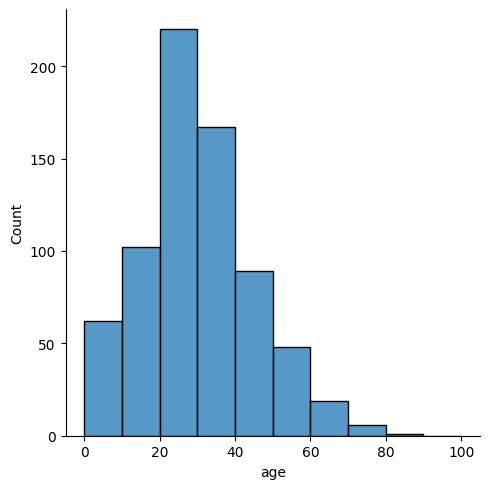

In [11]:
## 탑승자의 세대별 나이 분포 (displot의 hist) bins=range 사용
sns.displot(data=df, x='age', bins=range(0,101,10))
plt.show()

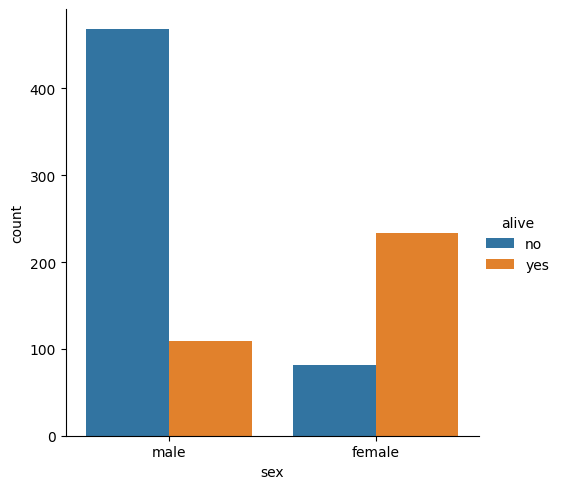

In [12]:
## 성별 생존여부 countplot
sns.catplot(data=df, x='sex', hue='alive', kind='count')
plt.show()

In [13]:
## 성별 생존여부 교차표 pd.crosstab()
pd.crosstab(df['sex'], df['alive'], margins=True)

alive,no,yes,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


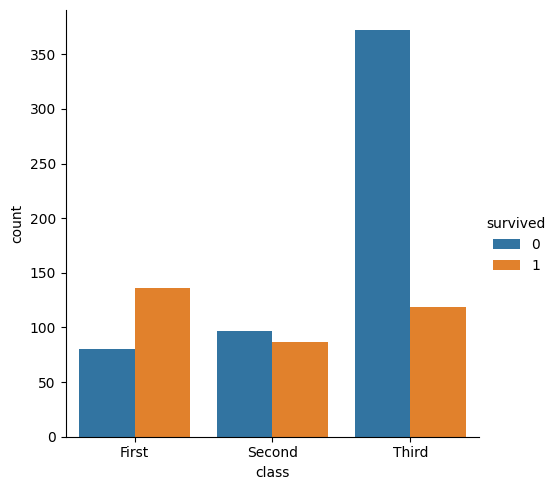

In [14]:
## 객실 등급별 생존 여부 countplot
sns.catplot(data=df, x='class', hue='survived', kind='count')
plt.show()

In [15]:
## 객실 등급별 생존 교차표
pd.crosstab(df['class'], df['alive'], margins=True)

alive,no,yes,All
class,,,
First,80,136,216
Second,97,87,184
Third,372,119,491
All,549,342,891


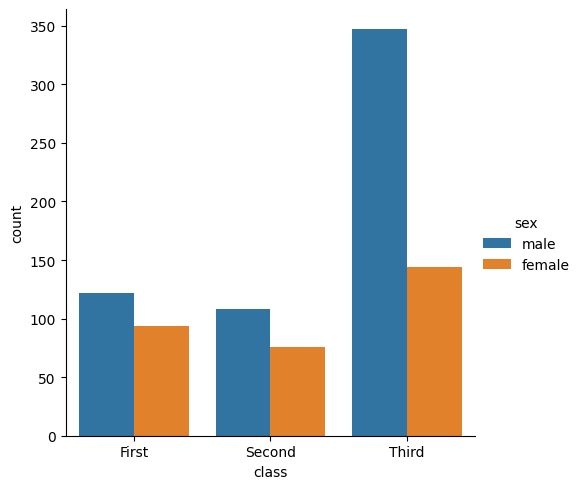

In [16]:
## 객실 등급별 성별 인원 
sns.catplot(data=df, x='class', hue='sex', kind='count')
plt.show()

In [17]:
## 객실 등급별 성별 교차표
pd.crosstab(df['class'], df['sex'], margins=True)

sex,female,male,All
class,,,
First,94,122,216
Second,76,108,184
Third,144,347,491
All,314,577,891


In [18]:
## 생존 여부에 따른 객실 들급별과 성별의 교차표
pd.crosstab(df['alive'],[df['class'], df['alive']], margins=True)

class First      Second     Third       All
alive    no  yes     no yes    no  yes     
alive                                      
no       80    0     97   0   372    0  549
yes       0  136      0  87     0  119  342
All      80  136     97  87   372  119  891

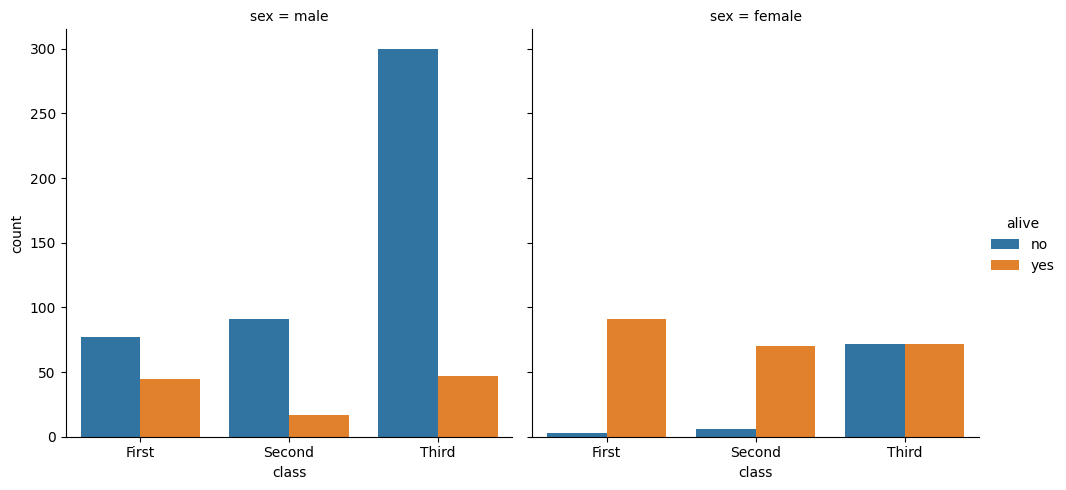

In [19]:
## 생존 여부에 따른 객실 들급별과 성별 인원 countplot
sns.catplot(data=df, x='class', hue='alive', col='sex', kind='count')
plt.show()

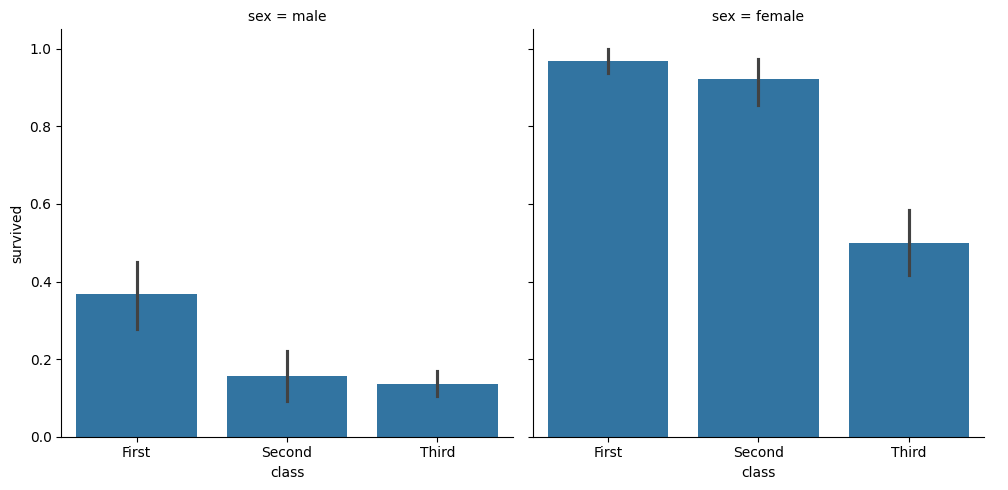

In [20]:
## 생존 여부에 따른 객실 들급별과 성별 인원 barplot
sns.catplot(data=df, x='class', y='survived', col='sex', kind='bar')
plt.show()

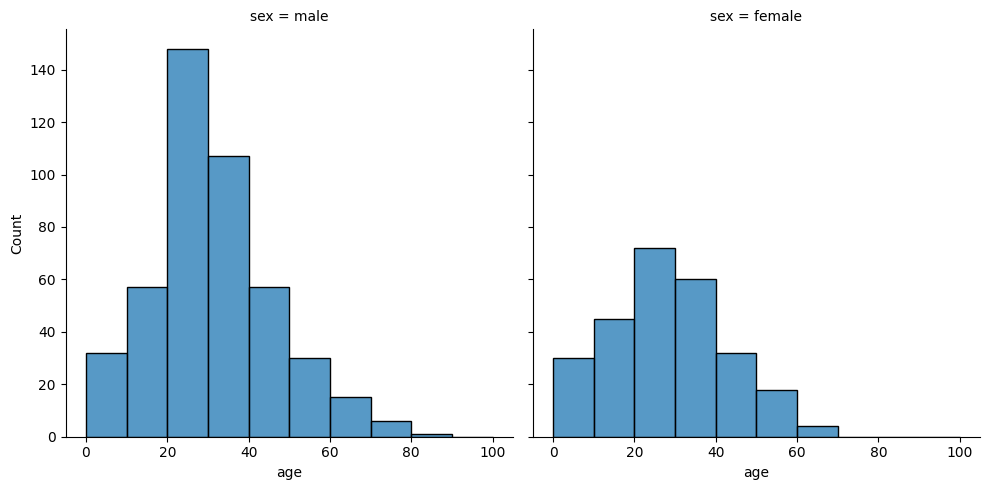

In [21]:
## 성별에 따른 나이분포 hist
sns.displot(data=df, x='age', col='sex', bins=range(0,101,10))
plt.show()

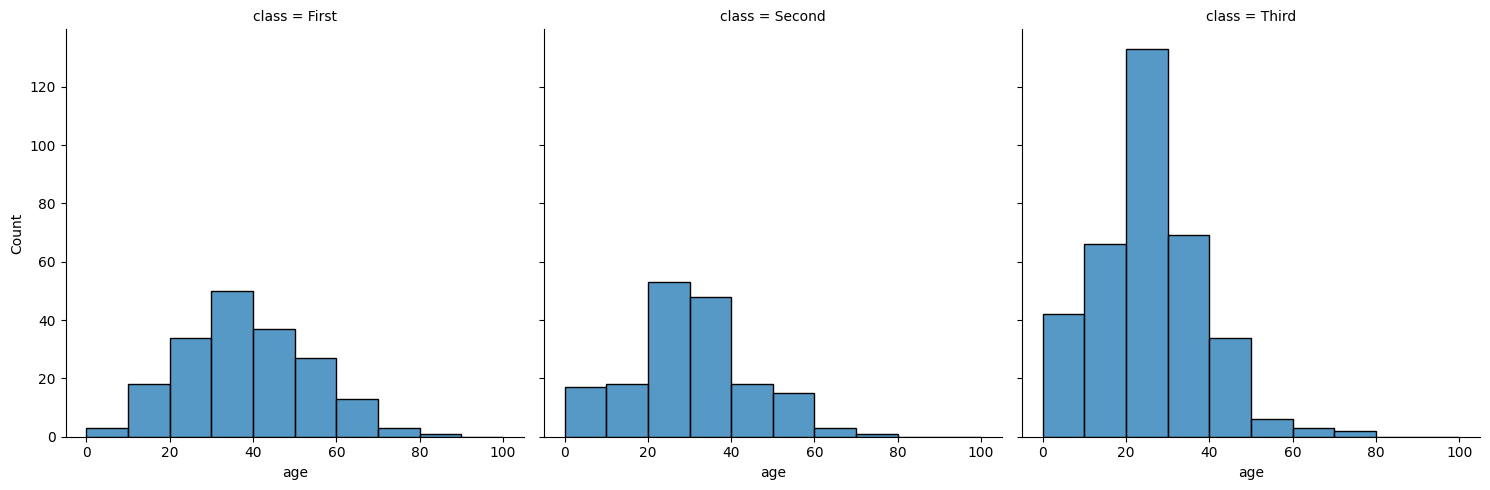

In [22]:
## 개실 등급별에 따른 나이분포 hist
sns.displot(data=df, x='age', col='class', bins=range(0,101,10))
plt.show()

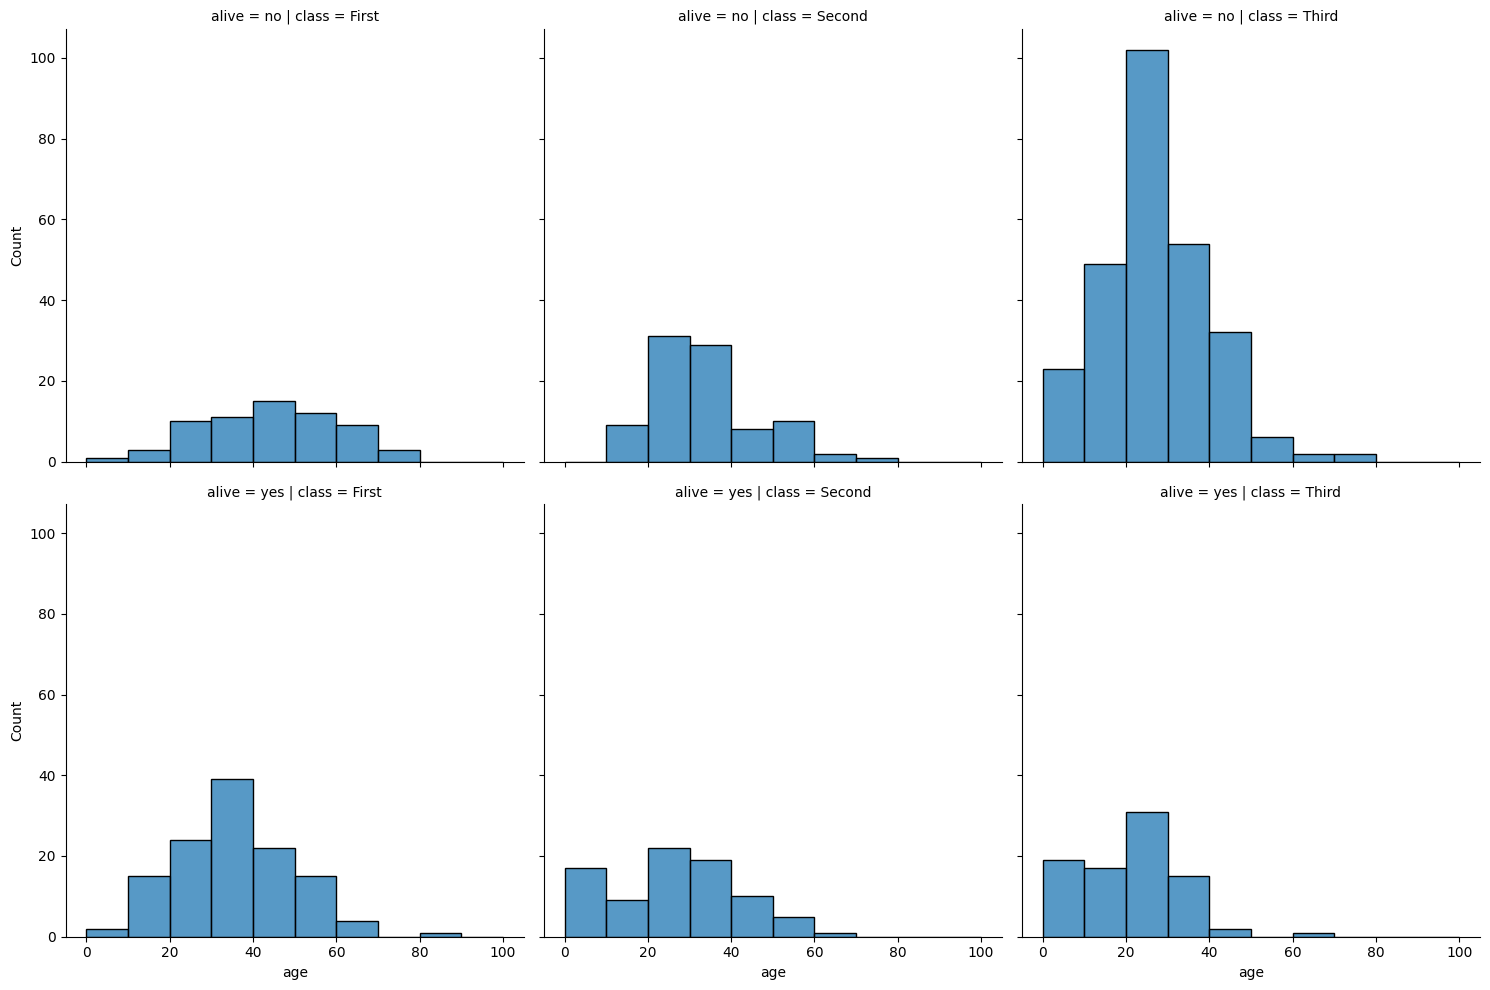

In [23]:
## 개실 등급별 생존 여부에 따른 나이분포 hist
sns.displot(data=df, x='age', col='class', row='alive', bins=range(0,101,10))
plt.show()

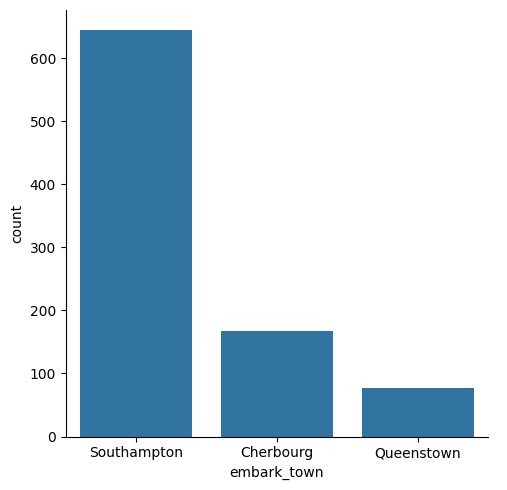

In [24]:
## 탑승 도시별 인원 수
sns.catplot(data=df, x='embark_town', kind='count')
plt.show()

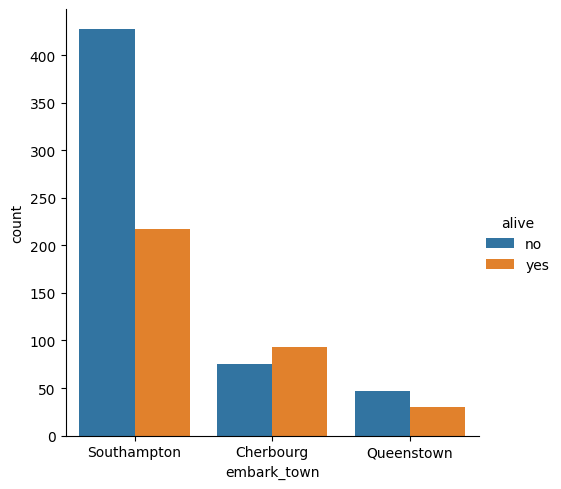

In [25]:
## 탑승 도시별 생존 여부 인원 수
sns.catplot(data=df, x='embark_town', hue='alive', kind='count')
plt.show()

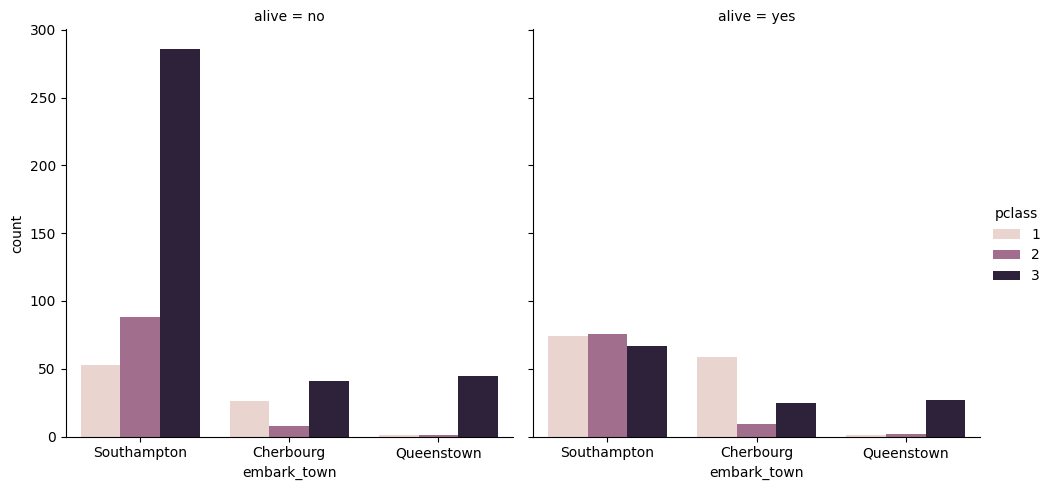

In [26]:
## 탑승 도시별 등급별 생존 여부 인원 수
sns.catplot(data=df, x='embark_town', col='alive', hue='pclass', kind='count')
plt.show()

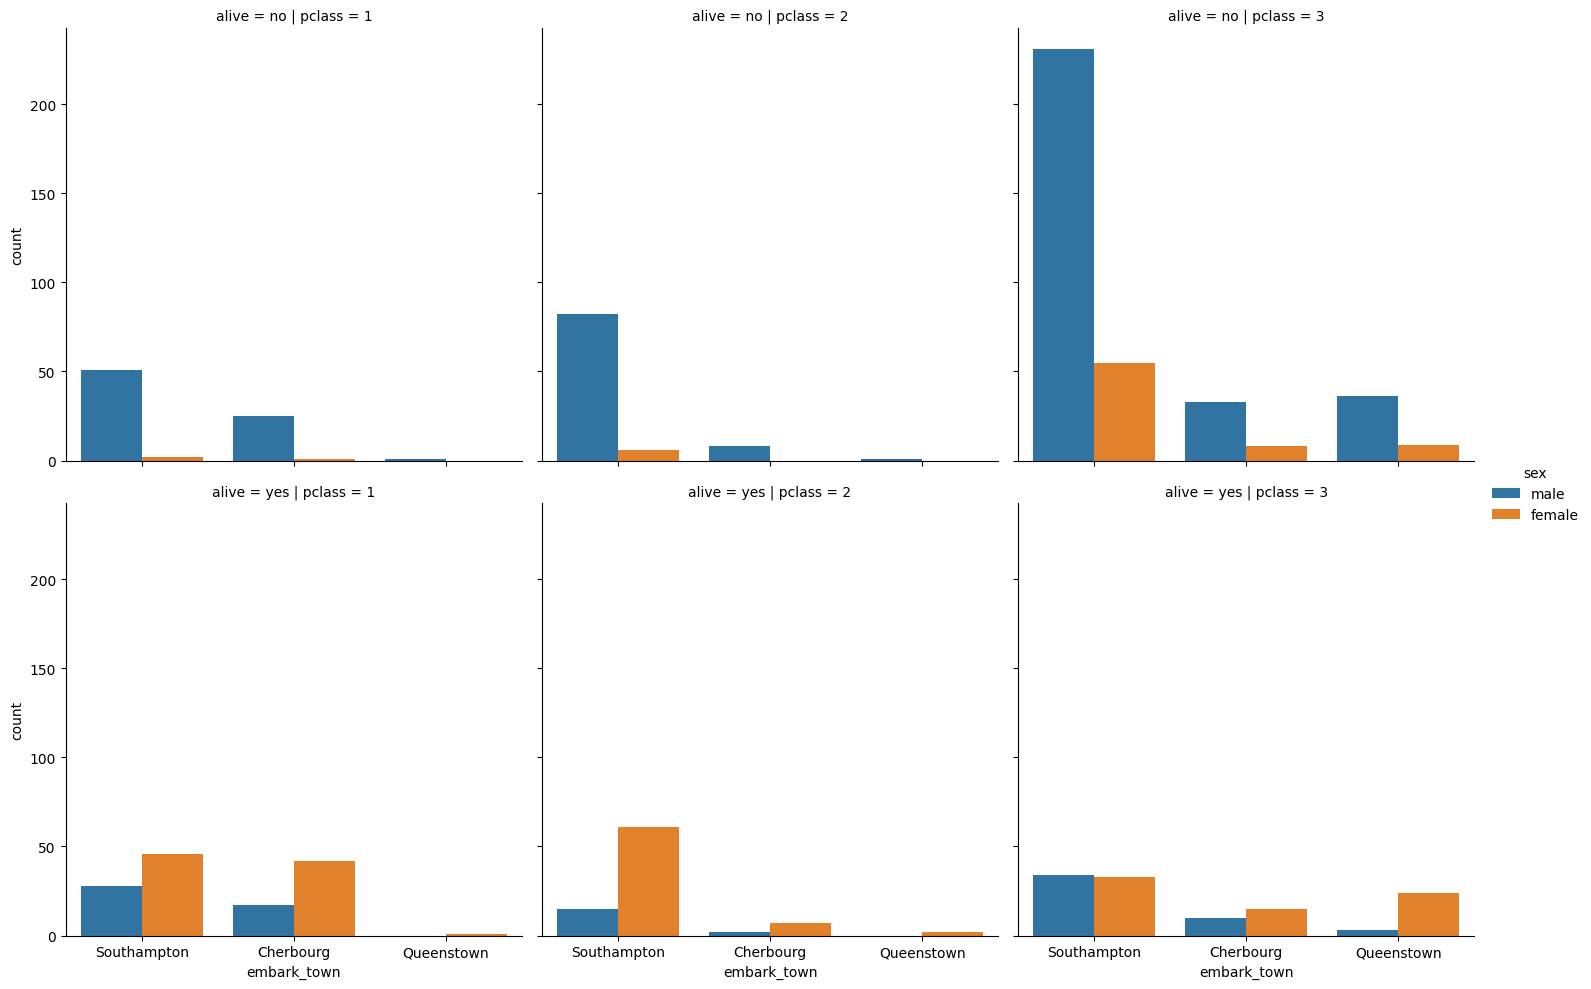

In [27]:
## 탑승 도시별 등급별 성별 생존 여부 인원 수
sns.catplot(data=df, x='embark_town', row='alive', col='pclass', hue='sex', kind='count')
plt.show()

In [28]:
# 탑승 도시별 등급별 성별 생존 여부 교차표
pd.crosstab(df['alive'],[df['embark_town'],df['sex'],df['pclass']], margins=True)

embark_town Cherbourg                     Queenstown                     \
sex            female        male             female        male          
pclass              1  2   3    1   2   3          1  2   3    1  2   3   
alive                                                                     
no                  1  0   8   25   8  33          0  0   9    1  1  36   
yes                42  7  15   17   2  10          1  2  24    0  0   3   
All                43  7  23   42  10  43          1  2  33    1  1  39   

embark_town Southampton                        All  
sex              female         male                
pclass                1   2   3    1   2    3       
alive                                               
no                    2   6  55   51  82  231  549  
yes                  46  61  33   28  15   34  340  
All                  48  67  88   79  97  265  889